In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import powerlaw as pl

In [141]:
path = os.getcwd()
df = pd.read_csv("8G1.csv", index_col = False)
G0_1km = nx.read_gexf(path + "/graph/G0_1km.gexf")
G0_3km = nx.read_gexf(path + "/graph/G0_3km.gexf")
G0_5km = nx.read_gexf(path + "/graph/G0_5km.gexf")

### in- and outdegree distribution

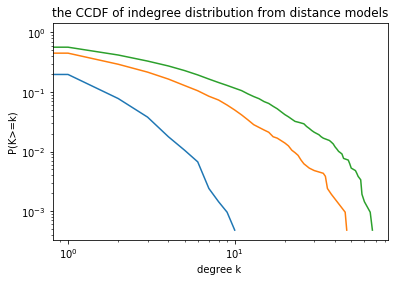

<Figure size 432x288 with 0 Axes>

In [3]:
plt.title("the CCDF of indegree distribution from distance models")
pl.plot_ccdf(df['1km_prox_indegree'])
pl.plot_ccdf(df['3km_prox_indegree'])
pl.plot_ccdf(df['5km_prox_indegree'])
plt.xlabel("degree k ")
plt.ylabel("P(K>=k)")
plt.show()
plt.savefig(path+ "/charts/indegree_distribution.png")

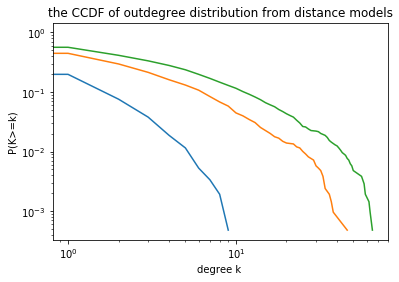

<Figure size 432x288 with 0 Axes>

In [4]:
plt.title("the CCDF of outdegree distribution from distance models")
pl.plot_ccdf(df['1km_prox_outdegree'])
pl.plot_ccdf(df['3km_prox_outdegree'])
pl.plot_ccdf(df['5km_prox_outdegree'])
plt.xlabel("degree k ")
plt.ylabel("P(K>=k)")
plt.show()
plt.savefig(path+ "/charts/outdegree_distribution.png")

### K-S test

In [5]:
from scipy.stats import ks_2samp

In [6]:
print(ks_2samp(df['1km_prox_indegree'], df['3km_prox_indegree']))
print(ks_2samp(df['1km_prox_indegree'], df['5km_prox_indegree']))
print(ks_2samp(df['3km_prox_indegree'], df['5km_prox_indegree']))

Ks_2sampResult(statistic=0.2520364159080019, pvalue=1.30248292037297e-58)
Ks_2sampResult(statistic=0.368471490177288, pvalue=2.1157960555528258e-126)
Ks_2sampResult(statistic=0.12553905126976522, pvalue=9.599296116977978e-15)


### corr and plots

In [44]:
### calculate_daily_p

daily_p = []
for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    mean_p = target['p'].mean()
    daily_p.append(mean_p)

In [21]:
### calculate daily_indr

indgr_1km = []

for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    
    mean_dgr = target['1km_prox_indegree'].mean()
    
    indgr_1km.append(mean_dgr)

indgr_3km = []

for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    
    mean_dgr = target['3km_prox_indegree'].mean()
    
    indgr_3km.append(mean_p)

indgr_5km= []

for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    
    mean_dgr = target['5km_prox_indegree'].mean()
    
    indgr_5km.append(mean_dgr)


In [22]:
### calculate daily_outdgr

outdgr_1km = []

for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    
    mean_dgr = target['1km_prox_outdegree'].mean()
    
    outdgr_1km.append(mean_p)

outdgr_3km = []

for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    
    mean_dgr = target['3km_prox_outdegree'].mean()
    
    outdgr_3km.append(mean_p)

outdgr_5km= []

for i in range(len(df)):
    source = df['date'][i]
    is_this = df['date'] == source
    target = df[is_this]
    
    mean_dgr = target['5km_prox_outdegree'].mean()
    
    outdgr_5km.append(mean_dgr)


In [100]:
dat = pd.DataFrame()

In [101]:
dat['date'] = df['date']

In [102]:
dat['daily_p'] = daily_p
dat['indgr_1km'] = indgr_1km
dat['indgr_3km'] = indgr_3km
dat['indgr_5km'] = indgr_5km
dat['outdgr_1km'] = outdgr_1km
dat['outdgr_3km'] = outdgr_3km
dat['outdgr_5km'] = outdgr_5km

In [103]:
dat['date'] = pd.to_datetime(dat['date'])

In [104]:
dat.set_index('date')

,daily_p,indgr_1km,indgr_3km,indgr_5km,outdgr_1km,outdgr_3km,outdgr_5km
date,,,,,,,
2014-01-01,1.098612,0.000000,0.658716,0.000000,0.658716,0.658716,4.000000
2014-01-03,0.901091,0.000000,0.658716,0.000000,0.658716,0.658716,2.000000
2014-01-05,0.901091,0.000000,0.658716,0.000000,0.658716,0.658716,1.000000
2014-01-11,0.482831,0.000000,0.658716,0.000000,0.658716,0.658716,4.000000
2014-01-12,0.552943,0.000000,0.658716,0.333333,0.658716,0.658716,1.333333
...,...,...,...,...,...,...,...
2019-12-27,0.925595,0.666667,0.658716,1.333333,0.658716,0.658716,0.333333
2019-12-27,0.925595,0.666667,0.658716,1.333333,0.658716,0.658716,0.333333
2019-12-29,0.658716,0.000000,0.658716,2.000000,0.658716,0.658716,0.000000


In [105]:
cols = dat.columns
cols = list(cols)

In [106]:
cols

['date',
 'daily_p',
 'indgr_1km',
 'indgr_3km',
 'indgr_5km',
 'outdgr_1km',
 'outdgr_3km',
 'outdgr_5km']

In [110]:
for i in range(1,8):
    taregt = cols[i]
    items = dat[target]
    mv5 = items.rolling(5).mean()
    name = "mv5" + cols[i]
    
    dat[name] = mv5

In [111]:
dat

,date,daily_p,indgr_1km,indgr_3km,indgr_5km,outdgr_1km,outdgr_3km,outdgr_5km,mv5daily_p,mv5indgr_1km,mv5indgr_3km,mv5indgr_5km,mv5outdgr_1km,mv5outdgr_3km,mv5outdgr_5km
0,2014-01-01,1.098612,0.000000,0.658716,0.000000,0.658716,0.658716,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,0.901091,0.000000,0.658716,0.000000,0.658716,0.658716,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-05,0.901091,0.000000,0.658716,0.000000,0.658716,0.658716,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-11,0.482831,0.000000,0.658716,0.000000,0.658716,0.658716,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-12,0.552943,0.000000,0.658716,0.333333,0.658716,0.658716,1.333333,0.787314,0.787314,0.787314,0.787314,0.787314,0.787314,0.787314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2019-12-27,0.925595,0.666667,0.658716,1.333333,0.658716,0.658716,0.333333,0.782412,0.782412,0.782412,0.782412,0.782412,0.782412,0.782412
2083,2019-12-27,0.925595,0.666667,0.658716,1.333333,0.658716,0.658716,0.333333,0.815197,0.815197,0.815197,0.815197,0.815197,0.815197,0.815197
2084,2019-12-29,0.658716,0.000000,0.658716,2.000000,0.658716,0.658716,0.000000,0.794605,0.794605,0.794605,0.794605,0.794605,0.794605,0.794605
2085,2019-12-29,0.658716,0.000000,0.658716,2.000000,0.658716,0.658716,0.000000,0.818843,0.818843,0.818843,0.818843,0.818843,0.818843,0.818843


In [112]:
mv = dat[['date','mv5daily_p', 'mv5indgr_1km', 'mv5indgr_3km', 'mv5indgr_5km','mv5outdgr_1km', 'mv5outdgr_3km', 'mv5outdgr_5km']]
mv = mv.set_index('date')

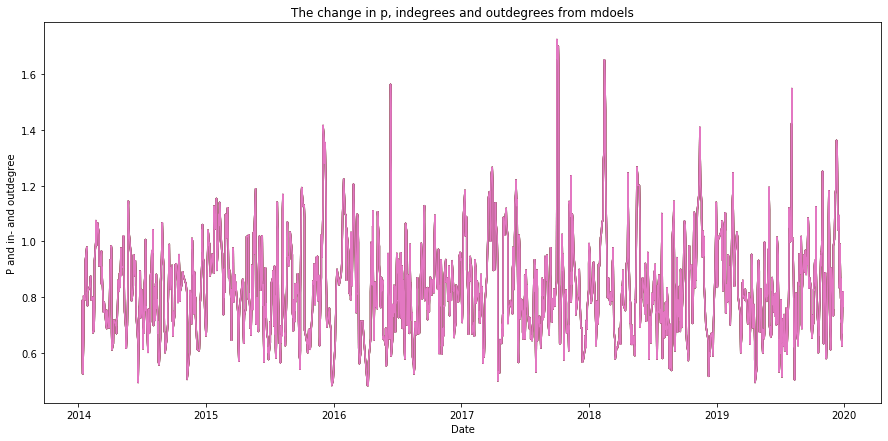

In [118]:
plt.figure(figsize=(15, 7))
plt.plot(mv)
plt.ylabel("P and in- and outdegree")
plt.xlabel("Date")
plt.title("The change in p, indegrees and outdegrees from mdoels")
plt.show()

### Centrality

In [137]:
G0_1km = pd.read_csv(path + "/graph/G0_1km.gexf")
G0_3km = pd.read_csv(path + "/graph/G0_3km.gexf")
G0_5km = pd.read_csv(path + "/graph/G0_5km.gexf")

In [ ]:
for i in range(1,8):
    taregt = cols[i]
    items = dat[target]
    mv5 = items.rolling(5).mean()
    name = "mv5" + cols[i]
    
    dat[name] = mv5

In [138]:
graphs = ['G0_1km', 'G0_3km', 'G0_5km']

In [121]:
cols = df.columns

In [148]:
cc = nx.closeness_centrality(G0_1km)
closeness = []
for node in G0_1km.nodes():
    results = cc[node]
    closeness.append(results)
df['cc_G0_1km'] = closeness

In [149]:
cc = nx.closeness_centrality(G0_3km)
closeness = []
for node in G0_3km.nodes():
    results = cc[node]
    closeness.append(results)
df['cc_G0_3km'] = closeness

In [150]:
cc = nx.closeness_centrality(G0_5km)
closeness = []
for node in G0_5km.nodes():
    results = cc[node]
    closeness.append(results)
df['cc_G0_5km'] = closeness

In [153]:
from scipy import stats

In [157]:
df

,ind,ind_t,date,adr,p,n_killed,n_injured,city,state,LON,...,30d_outdegree,5km_prox_indegree,5km_prox_outdegree,3km_prox_indegree,3km_prox_outdegree,1km_prox_indegree,1km_prox_outdegree,cc_G0_1km,cc_G0_3km,cc_G0_5km
0,0,0,2014-01-01,Rockingham Street and Berkley Avenue Extended ...,1.098612,2,2,Norfolk,Virginia,-76.278935,...,49,0,4,0,4,0,1,0.000000,0.000000,0.000000
1,1,1,2014-01-03,Farmers Boulevard and 133rd Avenue Queens New ...,0.901091,1,3,Queens,New York,-73.762898,...,49,0,2,0,2,0,0,0.000000,0.000000,0.000000
2,2,2,2014-01-05,829 Parade St Erie Pennsylvania,0.901091,1,3,Erie,Pennsylvania,-80.074524,...,51,0,1,0,1,0,0,0.000000,0.000000,0.000000
3,3,3,2014-01-11,3430 W. Capitol Street Jackson Mississippi,0.482831,0,4,Jackson,Mississippi,-90.228321,...,52,0,4,0,2,0,0,0.000000,0.000000,0.000000
4,4,4,2014-01-12,University Drive Huntsville Alabama,0.537528,0,5,Huntsville,Alabama,-86.650390,...,50,0,1,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2082,1204,2019-12-27,1575 Ridenour Pkwy NW Kennesaw Georgia,0.482831,0,4,Kennesaw,Georgia,-84.589220,...,3,1,0,1,0,0,0,0.000000,0.000479,0.000479
2083,2083,1204,2019-12-27,1900 block of Vernon Ave Modesto California,0.901091,1,3,Modesto,California,-121.027449,...,3,3,1,2,0,2,0,0.000959,0.000959,0.001438
2084,2084,1205,2019-12-29,800 block of Allacante Dr Ceres California,0.537528,0,5,Ceres,California,-120.983186,...,0,3,0,0,0,0,0,0.000000,0.000000,0.001534
2085,2085,1205,2019-12-29,50 block of Henrietta Ave Buffalo New York,0.901091,1,3,Buffalo,New York,-78.899919,...,0,1,0,1,0,0,0,0.000000,0.000479,0.000479


In [159]:
print(stats.pearsonr(df['n_killed'], df['cc_G0_1km']))
print(stats.pearsonr(df['n_injured'], df['cc_G0_1km']))

(-0.07030600024233467, 0.0013094935250133543)
(-0.0006056987532663594, 0.9779381267087482)


In [160]:
print(stats.pearsonr(df['n_killed'], df['cc_G0_3km']))
print(stats.pearsonr(df['n_injured'], df['cc_G0_3km']))

(-0.07985231252876254, 0.0002606163821591363)
(0.002155875212542851, 0.9215912866398317)


In [161]:
print(stats.pearsonr(df['n_killed'], df['cc_G0_5km']))
print(stats.pearsonr(df['n_injured'], df['cc_G0_5km']))

(-0.09003182677266194, 3.807031448140427e-05)
(0.00165590343097628, 0.9397353332026868)
